# News clustering - docsim

**INPUT**:

- given corpus of 180K articles

**OUTPUT**:

- indexing by LSI, Doc2Vec: Faster, Sharding, trainable for new documents
- model analytics

**APPLICATIONS**:

- Web interfaces: Text Area for query story --> Clustering: Top Similar Stories (Seeds), Top near-duplicated stories with scores
- Key words search: INPUT text box --> Search all stories related

## Load trained models

In [1]:
# import & logging preliminaries
import logging
import itertools

import gensim
from gensim.parsing.preprocessing import STOPWORDS

logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
from gensim import corpora, models, similarities

In [4]:
# load compact dict
dictionary = corpora.Dictionary.load("/home/laampt/nlp/docsim/build/news_180Kdoc.dict")

INFO:gensim.utils:loading Dictionary object from /home/laampt/nlp/docsim/build/news_180Kdoc.dict


In [5]:
# load lsi
lsi = models.LsiModel.load("/home/laampt/nlp/docsim/build/news_180Kdoc.lsi.mm")

INFO:gensim.utils:loading LsiModel object from /home/laampt/nlp/docsim/build/news_180Kdoc.lsi.mm
INFO:gensim.utils:loading id2word recursively from /home/laampt/nlp/docsim/build/news_180Kdoc.lsi.mm.id2word.* with mmap=None
INFO:gensim.utils:setting ignored attribute projection to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loading LsiModel object from /home/laampt/nlp/docsim/build/news_180Kdoc.lsi.mm.projection
INFO:gensim.utils:loading u from /home/laampt/nlp/docsim/build/news_180Kdoc.lsi.mm.projection.u.npy with mmap=None


In [6]:
print dictionary

Dictionary(392517 unique tokens: [u'deaebd', u'h\xe0ng_hi\u1ec7u_m\u1ef9', u'l\u01b0\u1ee3t', u'l\u01b0\u1ee3i', u'gag']...)


In [7]:
print lsi

LsiModel(num_terms=392517, num_topics=200, decay=1.0, chunksize=20000)


In [8]:
import numpy as np  
from gensim.models import Doc2Vec

In [9]:
dmm = Doc2Vec.load("/home/laampt/nlp/docsim/build/news_261K_dmm_5ns_200features_2minwords_5context_e5_lowercase_casentok_nostopword_20epo_alpha_r100")
print dmm

INFO:gensim.utils:loading Doc2Vec object from /home/laampt/nlp/docsim/build/news_261K_dmm_5ns_200features_2minwords_5context_e5_lowercase_casentok_nostopword_20epo_alpha_r100
INFO:gensim.utils:loading docvecs recursively from /home/laampt/nlp/docsim/build/news_261K_dmm_5ns_200features_2minwords_5context_e5_lowercase_casentok_nostopword_20epo_alpha_r100.docvecs.* with mmap=None
INFO:gensim.utils:loading doctag_syn0 from /home/laampt/nlp/docsim/build/news_261K_dmm_5ns_200features_2minwords_5context_e5_lowercase_casentok_nostopword_20epo_alpha_r100.docvecs.doctag_syn0.npy with mmap=None
INFO:gensim.utils:loading syn1neg from /home/laampt/nlp/docsim/build/news_261K_dmm_5ns_200features_2minwords_5context_e5_lowercase_casentok_nostopword_20epo_alpha_r100.syn1neg.npy with mmap=None
INFO:gensim.utils:loading syn0 from /home/laampt/nlp/docsim/build/news_261K_dmm_5ns_200features_2minwords_5context_e5_lowercase_casentok_nostopword_20epo_alpha_r100.syn0.npy with mmap=None
INFO:gensim.utils:setting

Doc2Vec(dm/m,d200,n5,w5,mc2,s1e-05,t8)


In [11]:
# get lsi index
from gensim.similarities.docsim import Similarity

index_lsi = Similarity.load('/home/laampt/nlp/docsim/build/news_180Kdoc_lsi.index')

INFO:gensim.utils:loading Similarity object from /home/laampt/nlp/docsim/build/news_180Kdoc_lsi.index


In [12]:
print index_lsi

Similarity index with 189288 documents in 6 shards (stored under shard)


## Helpers

In [13]:
import re 
import string
import unicodedata
import sys

STOPWORDS = [u"ấy", u"bị", u"bởi", u"cả", u"các", u"cái", u"cần", u"càng", u"chỉ", u"chiếc", u"cho", u"chứ", u"chưa", 
             u"chuyện", u"có", u"có_thể", u"cứ", u"của", u"cùng", u"cũng", u"đã", u"đang", u"đây", u"để", u"đến_nỗi", 
             u"đều", u"điều", u"do", u"đó", u"được", u"dưới", u"gì", u"khi", u"không", u"là", u"lại", u"lên", u"lúc", 
             u"mà", u"mỗi", u"một cách", u"này", u"nên", u"nếu", u"ngay", u"nhiều", u"như", u"nhưng", u"những", u"nơi", 
             u"nữa", u"phải", u"qua", u"ra", u"rằng", u"rất", u"rồi", u"sau", u"sẽ", u"so", u"sự", u"tại", u"theo", 
             u"thì", u"trên", u"trước", u"từ", u"từng", u"và", u"vẫn", u"vào", u"vậy", u"vì", u"việc", u"với", u"vừa",
             u"_num", u"wwdateww", u"wwtimeww", u"wwemailww", u"wwipww", u"wwurlww", u"wwnumberww"
            ]

tbl = dict.fromkeys(i for i in xrange(sys.maxunicode)
                      if unicodedata.category(unichr(i)).startswith('P') and i != 45 and i!= 95)

def vi_trans_unicode(su):
    return su.translate(tbl)

def vi_strip_text2(s):
    s = re.sub(r"&amp;", "", s)
    s = vi_trans_unicode(s)
    s = re.sub(r"<([^>]+)>", "", s)
    s = re.sub(r"(\s|\\n|\\r|\\t)+", " ", s)
    s = re.sub(r"__+", "_", s)
    s = re.sub(r"--+", "-", s)
    s = re.sub(r'(.)\1+', r'\1\1', s)
    s = ' '.join([w if not w[0].isdigit() else u"wwNUMBERww" for w in s.strip().split()])
    return s


def vi_clean3(line):
    words = line.replace('.','').strip().split()
    words = [w.lower() for w in words]
    return ' '.join(words)

def vi_remove_stop_1char(line):
    words = line.split()
    words = [w for w in words if w not in STOPWORDS and len(w) > 1]
    return ' '.join(words)

def vi_clean4(line):
    words = line.replace('.','').strip().split()
    words = [w.lower() for w in words if len(w) > 1]
    words = [w for w in words if w not in STOPWORDS]
    return ' '.join(words)

In [14]:
def get_lsi_index(lsi, dictionary, index_lsi, new_doc, topn=20):
    new_doc = vi_clean4(vi_strip_text2(new_doc))
    new_vec = dictionary.doc2bow(new_doc.split())
    new_vec_ls = lsi[new_vec]
    index_lsi.num_best = topn
    return index_lsi[new_vec_ls]

In [46]:
def get_dmm_index(dmm, new_doc, seed_ratio=0.3, topn=100):
    wvec = dmm.infer_vector(vi_clean4(vi_strip_text2(new_doc)).split())
    return [(d,v) for d,v in dmm.docvecs.most_similar(positive=[wvec], topn=topn) if v > seed_ratio]

In [22]:
# average all words
def get_vec(dmm,doc):
    vec_sum = np.zeros((1,200))
    words = set(doc.split())
    for word in words:
        if word in dmm.vocab:
            vec_sum += dmm[word]
    return vec_sum[0]

## Load random 1K docs

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

In [28]:
df = pd.read_json("/home/laampt/nlp/docsim/build/data/vt_1Kdocs_1Kwords_random_pd.json")

In [29]:
df = df[['Doc', 'Len', 'DMM', 'LSI', 'SUM']]
df.head()

,Doc,Len,DMM,LSI,SUM
100,công_nghệ cung_cấp nhân_lực cung_cấp dịch_vụ c...,107,9,0,63747
100012,hà_nội tổ_chức thái_nguyên ảnh vgp nguyệt_hà t...,229,8,0,14316
10023,hủy đăng_ký dịch_vụ cách khách_hàng soạn_tin_n...,63,7950,4,29
100574,bãi_biển riêng ông quyết_định biến món_quà thà...,317,2,2,213
100785,ai muốn sử_dụng bộ đôi lumia mới ra_mắt nhu_cầ...,78,2,2,260


## EDA

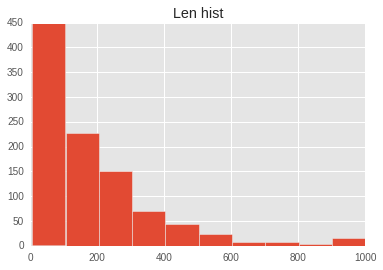

In [30]:
df.Len.hist()
plt.title("Len hist")
plt.show()

In [31]:
df[df.Len >= 200].describe()

,Len,DMM,LSI,SUM
count,324.000000,324.000000,324.000000,324.000000
mean,382.179012,6.935185,2.179012,3514.385802
std,189.149847,31.286435,5.426006,14209.067259
min,202.000000,0.000000,0.000000,0.000000
25%,253.500000,0.000000,0.000000,51.000000
50%,314.000000,0.000000,0.000000,220.000000
75%,445.000000,3.000000,1.000000,911.500000
max,1000.000000,353.000000,50.000000,153325.000000


In [32]:
df[df.Len >= 500].describe()

,Len,DMM,LSI,SUM
count,58.000000,58.000000,58.000000,58.000000
mean,717.586207,5.310345,2.689655,5631.913793
std,181.545706,15.673429,6.227294,22938.964894
min,501.000000,0.000000,0.000000,0.000000
25%,555.250000,0.000000,0.000000,20.250000
50%,666.000000,0.000000,0.000000,77.500000
75%,894.750000,2.750000,2.000000,420.250000
max,1000.000000,86.000000,31.000000,153325.000000


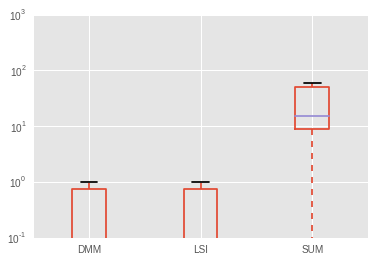

In [34]:
df2 = df[df.Len >= df.Len.max()][['DMM', 'LSI', 'SUM']]
df2.plot(kind='box', logy=True)
plt.show()

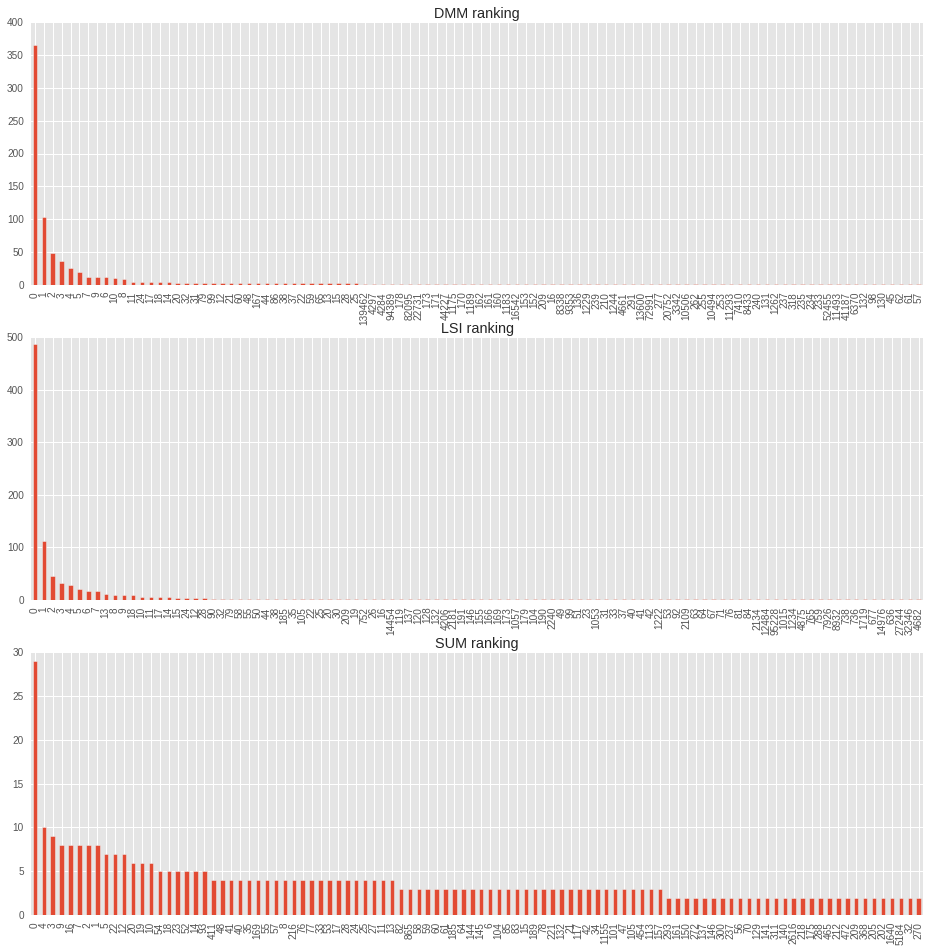

In [35]:
%matplotlib inline 

plt.figure(figsize=(16,16))
plt.subplot(311)
ax1 = df['DMM'].value_counts().head(100).plot(kind='bar', label='DMM')
ax1.set_title("DMM ranking")
plt.subplot(312)
ax2 = df.LSI.value_counts().head(100).plot(kind='bar', label='LSI')
ax2.set_title("LSI ranking")

plt.subplot(313)
ax3 = df.SUM.value_counts().head(100).plot(kind='bar', label='SUM')
ax3.set_title("SUM ranking")
plt.show()

In [36]:
dlm = df.groupby(by=['DMM', 'LSI']).agg({'Len': pd.Series.count})
dlm.rename(columns={'Len': 'Occurrences'}, inplace=True)
dlm.reset_index(inplace=True)
dlm.head()

,DMM,LSI,Occurrences
0,0,0,294
1,0,1,30
2,0,2,9
3,0,3,5
4,0,4,4


In [37]:
dlm_pivot = dlm.pivot('DMM', 'LSI', 'Occurrences')
dlm_pivot.fillna(0, inplace=True)
dlm_pivot.head()

LSI,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,28,29,30,31,32,33,35,37,38,40,41,42,44,49,50,51,53,55,58,63,64,67,71,76,79,81,84,86,90,92,99,104,105,110,119,120,128,132,137,146,155,166,169,173,179,185,190,191,204,209,220,236,240,257,267,269,271,287,304,340,343,344,358,369,389,415,420,429,433,440,444,505,537,564,636,677,736,738,752,759,765,811,820,821,829,847,900,913,917,950,975,1015,1053,1057,1062,1222,1228,1234,1275,1423,1495,1531,1719,1820,2030,2109,2127,2134,2181,2240,2259,3001,3333,3491,4206,4324,4682,4875,4896,7117,7582,7704,7926,8932,9013,9150,9582,10228,12484,14454,14976,18783,27244,32346,45989,49709,84391,95228
DMM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,294,30,9,5,4,5,2,1,1,0,1,0,0,2,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47,29,3,5,3,5,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12,13,8,3,0,1,4,3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,6,3,3,6,3,1,2,0,0,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3,4,4,3,1,0,1,0,0,0,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


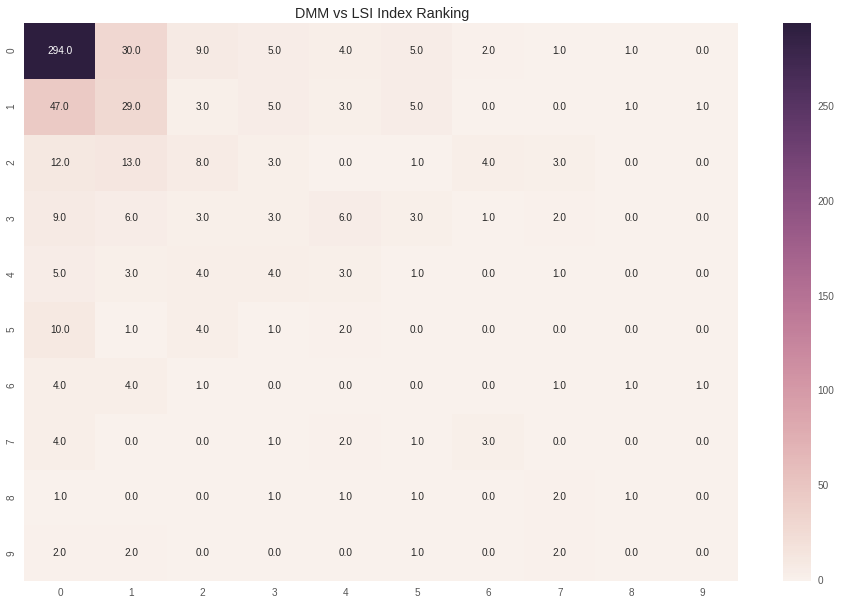

In [38]:
plt.figure(figsize=(16, 10))
plt.title('DMM vs LSI Index Ranking')
sns.heatmap(dlm_pivot.as_matrix()[:10,:10], annot=True, fmt='')
plt.show()

## Query

In [39]:
rand_idx = np.random.randint(0,180000, 1000)
print len(rand_idx)

1000


In [41]:
import codecs

test_docs = []
with codecs.open("/home/laampt/nlp/docsim/build/data/vt.261K.casen.txt.10word.nodup.clean.nodup", encoding="utf-8", mode='r') as fin:
    for i, line in enumerate(fin):
        if i in rand_idx:
            test_docs.append((i,line))

In [50]:
test_id = 0
test_doc = test_docs[test_id]
print test_doc[1]
print test_doc[0]

print
print "LSI top 10"
lsi10 = get_lsi_index(lsi, dictionary, index_lsi, test_doc[1], topn=10)
print lsi10

print
print "DMM top 10"
dmm10 = get_dmm_index(dmm, test_doc[1], seed_ratio=0.3, topn=10)
print dmm10


mê_bóng_đá báo_bóng_đá tin_bóng_đá_online home bóng_đá anh viettel giành ngôi_đầu_bảng viettel giành ngôi_đầu_bảng ngày đăng chuyên_mục bóng_đá anh views báo bóng_đá ngoại_hạng_anh viettel long_an giành trọn điểm trong lượt trận đầu_tiên bảng vck giải qg cup tôn_hoa_sen chiều bảng vck giải qg cúp tôn_hoa_sen diễn_ra trận đấu_đầu tiên long_an khá vất_vả thu_về điểm bd trong viettel dễ_dàng thể_hiện sức_mạnh bằng chiến_thắng kqbd thừa_thiên_huế_trên sân vinh trận_đấu giữa đội_bóng đến đông_nam_bộ diễn_ra sôi_nổi kịch_tính dù long_an dẫn_trước nhờ àn thắng phút bd bàn rút_ngắn_tỷ_số xuống phút hiến cuối trận_đấu trở_nên quyết_liệt cập_nhật bảng_xếp_hạng ngoại_hạng_anh hôm_nay tuy nhiên nỗ_lực đẩy cao đội_hình tìm bàn gỡ_hòa bd mang kết_quả họ mong_muốn giúp long_an khép trận_đấu trọn_vẹn điểm trận_đấu diễn_ra giờ sân qk viettel một_trong_những ứng_cử_viên vô_địch dễ_dàng vượt thừa_thiên_huế kết_quả đủ viettel chiếm ngôi_đầu_bảng lượt trận đầu_tiên đồng_thời màn khởi_đầu suôn_sẻ vck năm_na

In [58]:
result_idx = [(i,v) for i,v in lsi10] + [(int(j.split('_')[-1]),v) for j,v in dmm10]
result_idx = sorted(result_idx, key=lambda x: x[1], reverse=True)
print result_idx

[(84, 1.0000003576278687), (60691, 0.96174132823944092), (43587, 0.95969963073730469), (92186, 0.95963764190673828), (154959, 0.95540320873260498), (68380, 0.95503056049346924), (33753, 0.92897087335586548), (134113, 0.90363204479217529), (59052, 0.89767003059387207), (184229, 0.89661550521850586), (68380, 0.7776418924331665), (154959, 0.7535706162452698), (60691, 0.7518629431724548), (43587, 0.7435747981071472), (33753, 0.7369182109832764), (81050, 0.7328498959541321), (184439, 0.7275193929672241), (92236, 0.7196885347366333), (6151, 0.709246039390564), (98985, 0.7051456570625305)]


In [59]:
from collections import defaultdict

In [65]:
result = defaultdict(list)

for k,v in result_idx:
    result[k].append(v)

for k,v in result.iteritems():
    result[k] = np.mean(v)
    
print result

defaultdict(<type 'list'>, {134113: 0.90363204479217529, 43587: 0.85163721442222595, 184229: 0.89661550521850586, 6151: 0.70924603939056396, 92236: 0.7196885347366333, 59052: 0.89767003059387207, 98985: 0.70514565706253052, 154959: 0.85448691248893738, 60691: 0.85680213570594788, 84: 1.0000003576278687, 184439: 0.72751939296722412, 33753: 0.83294454216957092, 92186: 0.95963764190673828, 68380: 0.86633622646331787, 81050: 0.73284989595413208})


In [67]:
with codecs.open("/home/laampt/nlp/docsim/build/data/vt.261K.casen.txt.10word.nodup.clean.nodup", encoding="utf-8", mode='r') as fin:
    for i, line in enumerate(fin):
        if i in result.keys():
            print line
            print i, result[i]

mê_bóng_đá báo_bóng_đá tin_bóng_đá_online home bóng_đá anh viettel giành ngôi_đầu_bảng viettel giành ngôi_đầu_bảng ngày đăng chuyên_mục bóng_đá anh views báo bóng_đá ngoại_hạng_anh viettel long_an giành trọn điểm trong lượt trận đầu_tiên bảng vck giải qg cup tôn_hoa_sen chiều bảng vck giải qg cúp tôn_hoa_sen diễn_ra trận đấu_đầu tiên long_an khá vất_vả thu_về điểm bd trong viettel dễ_dàng thể_hiện sức_mạnh bằng chiến_thắng kqbd thừa_thiên_huế_trên sân vinh trận_đấu giữa đội_bóng đến đông_nam_bộ diễn_ra sôi_nổi kịch_tính dù long_an dẫn_trước nhờ àn thắng phút bd bàn rút_ngắn_tỷ_số xuống phút hiến cuối trận_đấu trở_nên quyết_liệt cập_nhật bảng_xếp_hạng ngoại_hạng_anh hôm_nay tuy nhiên nỗ_lực đẩy cao đội_hình tìm bàn gỡ_hòa bd mang kết_quả họ mong_muốn giúp long_an khép trận_đấu trọn_vẹn điểm trận_đấu diễn_ra giờ sân qk viettel một_trong_những ứng_cử_viên vô_địch dễ_dàng vượt thừa_thiên_huế kết_quả đủ viettel chiếm ngôi_đầu_bảng lượt trận đầu_tiên đồng_thời màn khởi_đầu suôn_sẻ vck năm_na

## Demo

In [53]:
import IPython.html.widgets as widgets
from IPython.display import display, clear_output

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [75]:
def get_similar_docs(a):
    test_doc = textarea.value
    lsi10 = get_lsi_index(lsi, dictionary, index_lsi, test_doc, topn=10)
    dmm10 = get_dmm_index(dmm, test_doc, seed_ratio=0.3, topn=10)
    result_idx = [(i,v) for i,v in lsi10] + [(int(j.split('_')[-1]),v) for j,v in dmm10]
    result = defaultdict(list)

    for k,v in result_idx:
        result[k].append(v)

    for k,v in result.iteritems():
        result[k] = np.mean(v)
    out = []
    with codecs.open("/home/laampt/nlp/docsim/build/data/vt.261K.casen.txt.10word.nodup.clean.nodup", encoding="utf-8", mode='r') as fin:
        for i, line in enumerate(fin):
            if i in result.keys():
                out.append((i,result[i], line))
    out = sorted(out, key=lambda x: x[1], reverse=True)
    df_out = pd.DataFrame(out, columns=['Index', 'Score', 'Doc'])
    display(df_out)

In [81]:
clear_output()
textarea = widgets.Textarea(value="Input document to get related")
button = widgets.ButtonWidget(description = 'Get similar!')
button.on_click(get_similar_docs)

display(textarea)
display(button)

,Index,Score,Doc
0,16860,0.925644,website trang thông tin điện tử tổng_hợp thuộc...
1,134886,0.920216,bắt_đầu in website trang thông tin điện tử tổn...
2,16830,0.919455,website trang thông tin điện tử tổng_hợp thuộc...
3,39882,0.916890,website trang thông tin điện tử tổng_hợp thuộc...
4,184439,0.906036,website trang thông tin điện tử tổng_hợp thuộc...
5,99460,0.905983,website trang thông tin điện tử tổng_hợp thuộc...
6,92236,0.844362,đkvđ hn khởi_đầu thuận_lợi thứ am chiều vck gi...
7,43591,0.840815,đkvđ hn khởi_đầu thuận_lợi hn xuất_sắc đánh_bạ...
8,39888,0.839985,khai_mạc vck qg cúp tôn hoa_sen đkvđ hn khởi_đ...
9,131750,0.827124,đkvđ hn khởi_đầu thuận_lợi chiều vck giải qg c...
